In [21]:
import numpy as np
import pandas as pd
import joblib
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

In [2]:
train_df = joblib.load('../../dataset/train_preprocessed_classification.joblib')
test_df = joblib.load('../../dataset/test_preprocessed_classification.joblib')

In [3]:
X_train = train_df.drop('fraudulent', axis=1)
y_train = train_df.fraudulent
X_test = test_df.drop('fraudulent', axis=1)
y_test = test_df.fraudulent

In [4]:
param_grid = {
    'min_samples_leaf': [15, 20],
    'max_iter': [50, 100]
}

In [5]:
model = HistGradientBoostingClassifier()

In [6]:
model.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [8]:
# gets stuck in an infinite loop?
grid_search = GridSearchCV(model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [7]:
y_pred = model.predict(X_test)

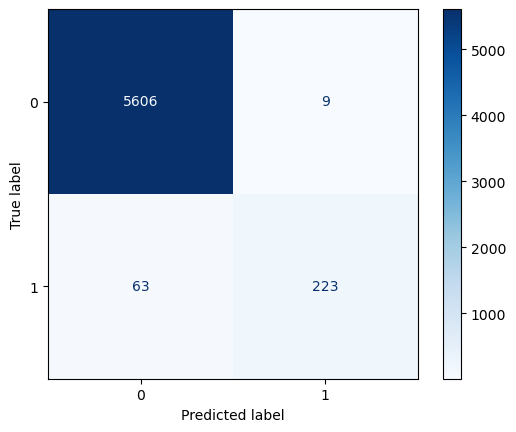

In [11]:
disp = ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        display_labels=[0, 1],
        cmap=plt.cm.Blues,
        normalize=None,
    )

In [12]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

In [15]:
report = classification_report(y_test, y_pred, zero_division=0)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5615
           1       0.96      0.78      0.86       286

    accuracy                           0.99      5901
   macro avg       0.98      0.89      0.93      5901
weighted avg       0.99      0.99      0.99      5901



In [16]:
joblib.dump(model, 'gradient_boosting_classifier.joblib')

['gradient_boosting_classifier.joblib']

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [22]:
roc_auc = auc(fpr, tpr)

In [24]:
joblib.dump((fpr, tpr, roc_auc), 'gb_roc.joblib')

['gb_roc.joblib']